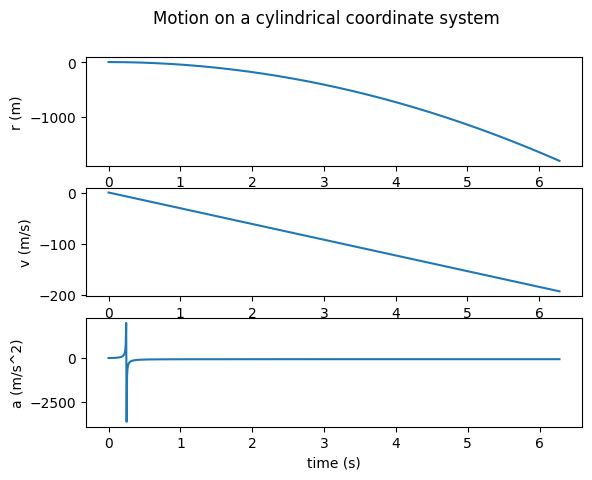

Position (m): [3, 2.9981832711651144, 2.992733084660457, 2.9836494404860288, 2.970932338641829, 2.954581779127858, 2.9345977619441155, 2.9109802870906014, 2.883729354567316, 2.8528449643742597, 2.8183271165114316, 2.7801758109788324, 2.7383910477764615, 2.6929728269043194, 2.643921148362406, 2.591236012150721, 2.534917418269265, 2.4749653667180374, 2.4113798574970384, 2.3441608906062683, 2.2733084660457266, 2.1988225838154136, 2.120703243915329, 2.0389504463454733, 1.9535641911058461, 1.8645444781964475, 1.7718913076172775, 1.6756046793683361, 1.5756845934496235, 1.4721310498611395, 1.364944048602884, 1.2541235896748573, 1.139669673077059, 1.0215822988094896, 0.8998614668721487, 0.7745071772650365, 0.6455194299881529, 0.512898225041498, 0.3766435624250716, 0.23675544213887384, 0.09323386418290475, -0.05392117144283573, -0.20470966473834756, -0.3591316157036307, -0.5171870243386852, -0.6788758906435112, -0.8441982146181084, -1.0131539962624772, -1.1857432355766173, -1.3619659325605287, 

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.8  # m/s^2
M = 0.5  # kg
p0 = 3  # m/rad
L = 2  # m/rad
r = L / p0
h0 = 1  # m
hf = 0.5  # m

def m(x):
    return np.sqrt(2 * g * (h0 - hf))

def f(t, y):
    r, p = y
    rp = p0 * p
    pp = -m(r) * g
    return np.array([rp, pp])

t0 = 0  # s
tf = 2 * np.pi  # s
N = 1000
h = (tf - t0) / N

# Initial conditions
y0 = np.array([p0, 0])  # r(0) = p0, v(0) = 0

# Runge-Kutta method
t = t0
y = y0
r = [y[0]]
v = [y[1]]
a = []
for i in range(N):
    k1 = h * f(t, y)
    k2 = h * f(t + h/2, y + k1/2)
    k3 = h * f(t + h/2, y + k2/2)
    k4 = h * f(t + h, y + k3)
    y = y + (k1 + 2*k2 + 2*k3 + k4) / 6
    t = t + h
    r.append(y[0])
    v.append(y[1])
    a.append(m(y[0]) * (y[1]**2) / y[0])

# Plot results
t = np.linspace(t0, tf, N+1)
fig, axs = plt.subplots(3)
fig.suptitle('Motion on a cylindrical coordinate system')
axs[0].plot(t, r)
axs[0].set(ylabel='r (m)')
axs[1].plot(t, v)
axs[1].set(ylabel='v (m/s)')
axs[2].plot(t[:-1], a)
axs[2].set(ylabel='a (m/s^2)', xlabel='time (s)')
plt.show()


print("Position (m):", r)
print("Velocity (m/s):", v)
print("Acceleration (m/s^2):", a)


In [31]:
import pandas as pd


# Convert r, v, a arrays to a pandas dataframe
t = np.linspace(t0, tf, N+1)[:-1]
df = pd.DataFrame({'time (s)': t,
                   'position (m)': r[:-1],
                   'velocity (m/s)': v[:-1],
                   'acceleration (m/s^2)': a})
df


,time (s),position (m),velocity (m/s),acceleration (m/s^2)
0,0.000000,3.000000,0.000000,0.038797
1,0.006283,2.998183,-0.192761,0.155469
2,0.012566,2.992733,-0.385522,0.350870
3,0.018850,2.983649,-0.578283,0.626438
4,0.025133,2.970932,-0.771044,0.984226
...,...,...,...,...
995,6.251769,-1795.606965,-191.797112,-64.133424
996,6.258053,-1799.224072,-191.989873,-64.133209
997,6.264336,-1802.844812,-192.182633,-64.132996
998,6.270619,-1806.469186,-192.375394,-64.132783
